# Exploratory Data Analysis

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [2]:
sample_data = pd.read_csv("ATM_sample.csv")
sample_data.head()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,10.18,10,1,0,0,0,72.750556
1,9.74,10,1,1,0,0,66.720482
2,0.96,2,0,0,0,1,19.189516
3,9.58,9,1,1,0,1,67.388669
4,1.03,4,0,1,0,1,15.813127


In [3]:
# Check for missing values 
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Shops     22000 non-null  float64
 1   ATMs      22000 non-null  int64  
 2   Downtown  22000 non-null  int64  
 3   Weekday   22000 non-null  int64  
 4   Center    22000 non-null  int64  
 5   High      22000 non-null  int64  
 6   Withdraw  22000 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


In [4]:
# Summary statistics
sample_data.describe()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
count,22000.000000,22000.000000,22000.00000,22000.000000,22000.000000,22000.000000,22000.000000
mean,7.316373,7.937455,0.70200,0.714091,0.102455,0.301591,54.652818
std,4.118692,3.673415,0.45739,0.451857,0.303252,0.458959,25.099767
min,0.800000,0.000000,0.00000,0.000000,0.000000,0.000000,11.668197
25%,1.050000,4.000000,0.00000,0.000000,0.000000,0.000000,18.500386
50%,9.890000,9.000000,1.00000,1.000000,0.000000,0.000000,68.240749
75%,10.070000,11.000000,1.00000,1.000000,0.000000,1.000000,71.345778
max,10.830000,17.000000,1.00000,1.000000,1.000000,1.000000,103.964065


In [5]:
# Count frequency of result for each variable 
variables = ['Downtown', 'High', 'Weekday', 'Center']

for var in variables:
    for value in [0, 1]:
        count = sample_data[var].eq(value).sum()
        print(f"{var}_{value}: {count}")

Downtown_0: 6556
Downtown_1: 15444
High_0: 15365
High_1: 6635
Weekday_0: 6290
Weekday_1: 15710
Center_0: 19746
Center_1: 2254


## Histogram of 'Withdraw'

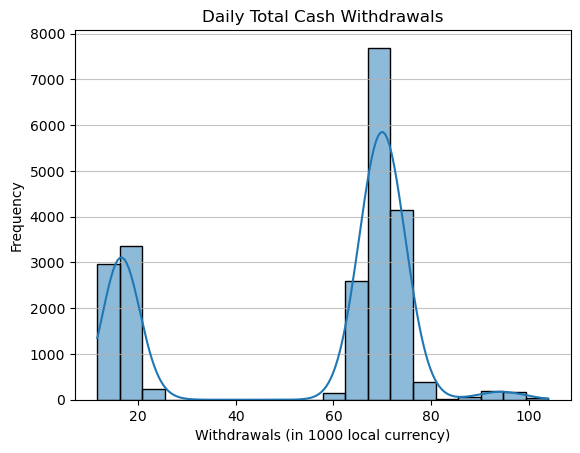

In [6]:
sns.histplot(sample_data['Withdraw'], bins=20, kde=True)
plt.title('Daily Total Cash Withdrawals')
plt.xlabel('Withdrawals (in 1000 local currency)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Barplot of Categorical Values

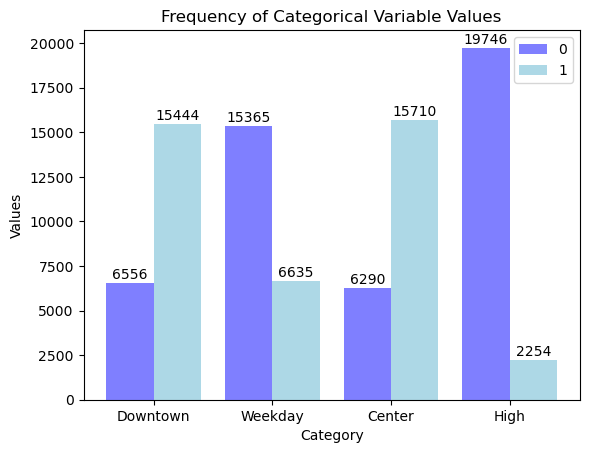

In [7]:
cat_data = {'Category': ['Downtown', 'Weekday', 'Center', 'High'],
           'value_0': [6556, 15365, 6290, 19746],
           'value_1': [15444, 6635, 15710, 2254]}


cat_df = pd.DataFrame(cat_data)


positions = range(len(cat_df))


width = 0.4


bars1 = plt.bar(positions, cat_df['value_0'], width=width, label='0', color='blue', alpha=0.5)
bars2 = plt.bar([pos + width for pos in positions], cat_df['value_1'], width=width, label='1', color='lightblue',
               alpha=1)


for bar1, bar2 in zip(bars1, bars2):
   height1 = bar1.get_height()
   height2 = bar2.get_height()
   plt.annotate(f'{height1}', xy=(bar1.get_x() + bar1.get_width() / 2, height1), xytext=(0, 3),
                textcoords='offset points', ha='center')
   plt.annotate(f'{height2}', xy=(bar2.get_x() + bar2.get_width() / 2, height2), xytext=(0, 3),
                textcoords='offset points', ha='center')


plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Frequency of Categorical Variable Values')
plt.xticks([pos + width / 2 for pos in positions], cat_df['Category'])
plt.legend()


plt.show()

## Pairwise Plot

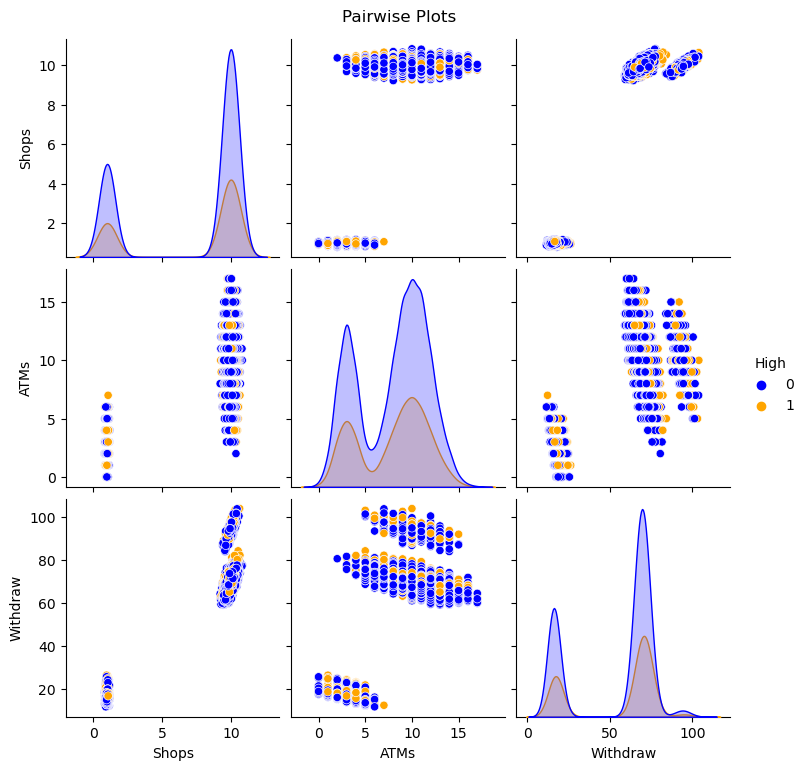

In [8]:
sns.pairplot(sample_data, vars=['Shops', 'ATMs', 'Withdraw'], hue='High', palette={0:'blue', 1: 'orange'})
plt.suptitle("Pairwise Plots", y=1.02)
plt.show()

## Scatterplot: 'Withdraw' Vs Continuous Variables

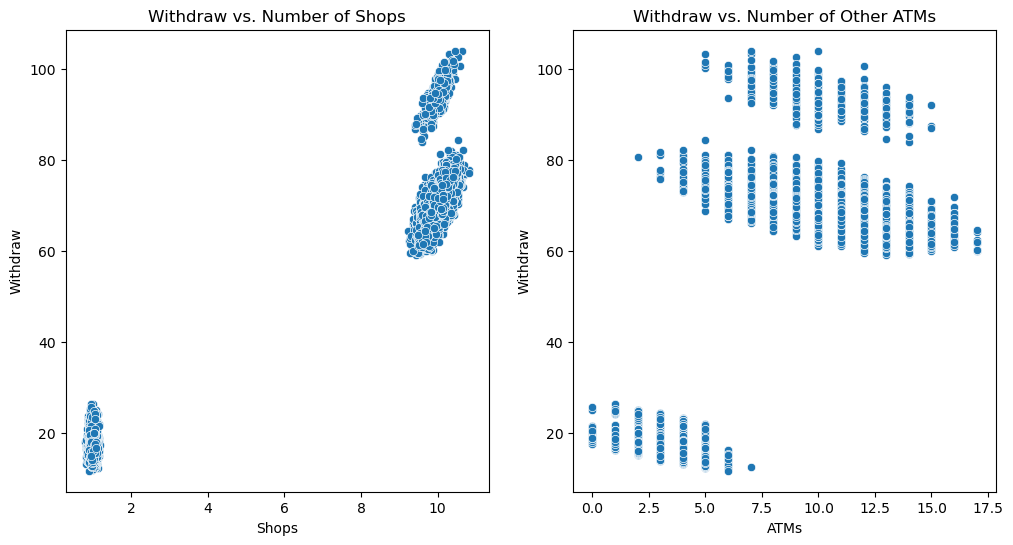

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=sample_data['Shops'], y=sample_data['Withdraw'])
plt.title("Withdraw vs. Number of Shops")


plt.subplot(1, 2, 2)
sns.scatterplot(x=sample_data['ATMs'], y=sample_data['Withdraw'])
plt.title("Withdraw vs. Number of Other ATMs")


plt.show()

## Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

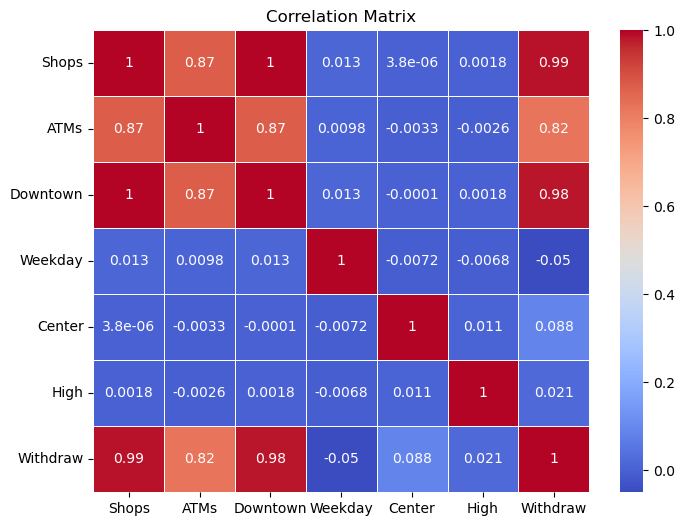

In [10]:
correlation_matrix = sample_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")

## Pairwise plots with all variables

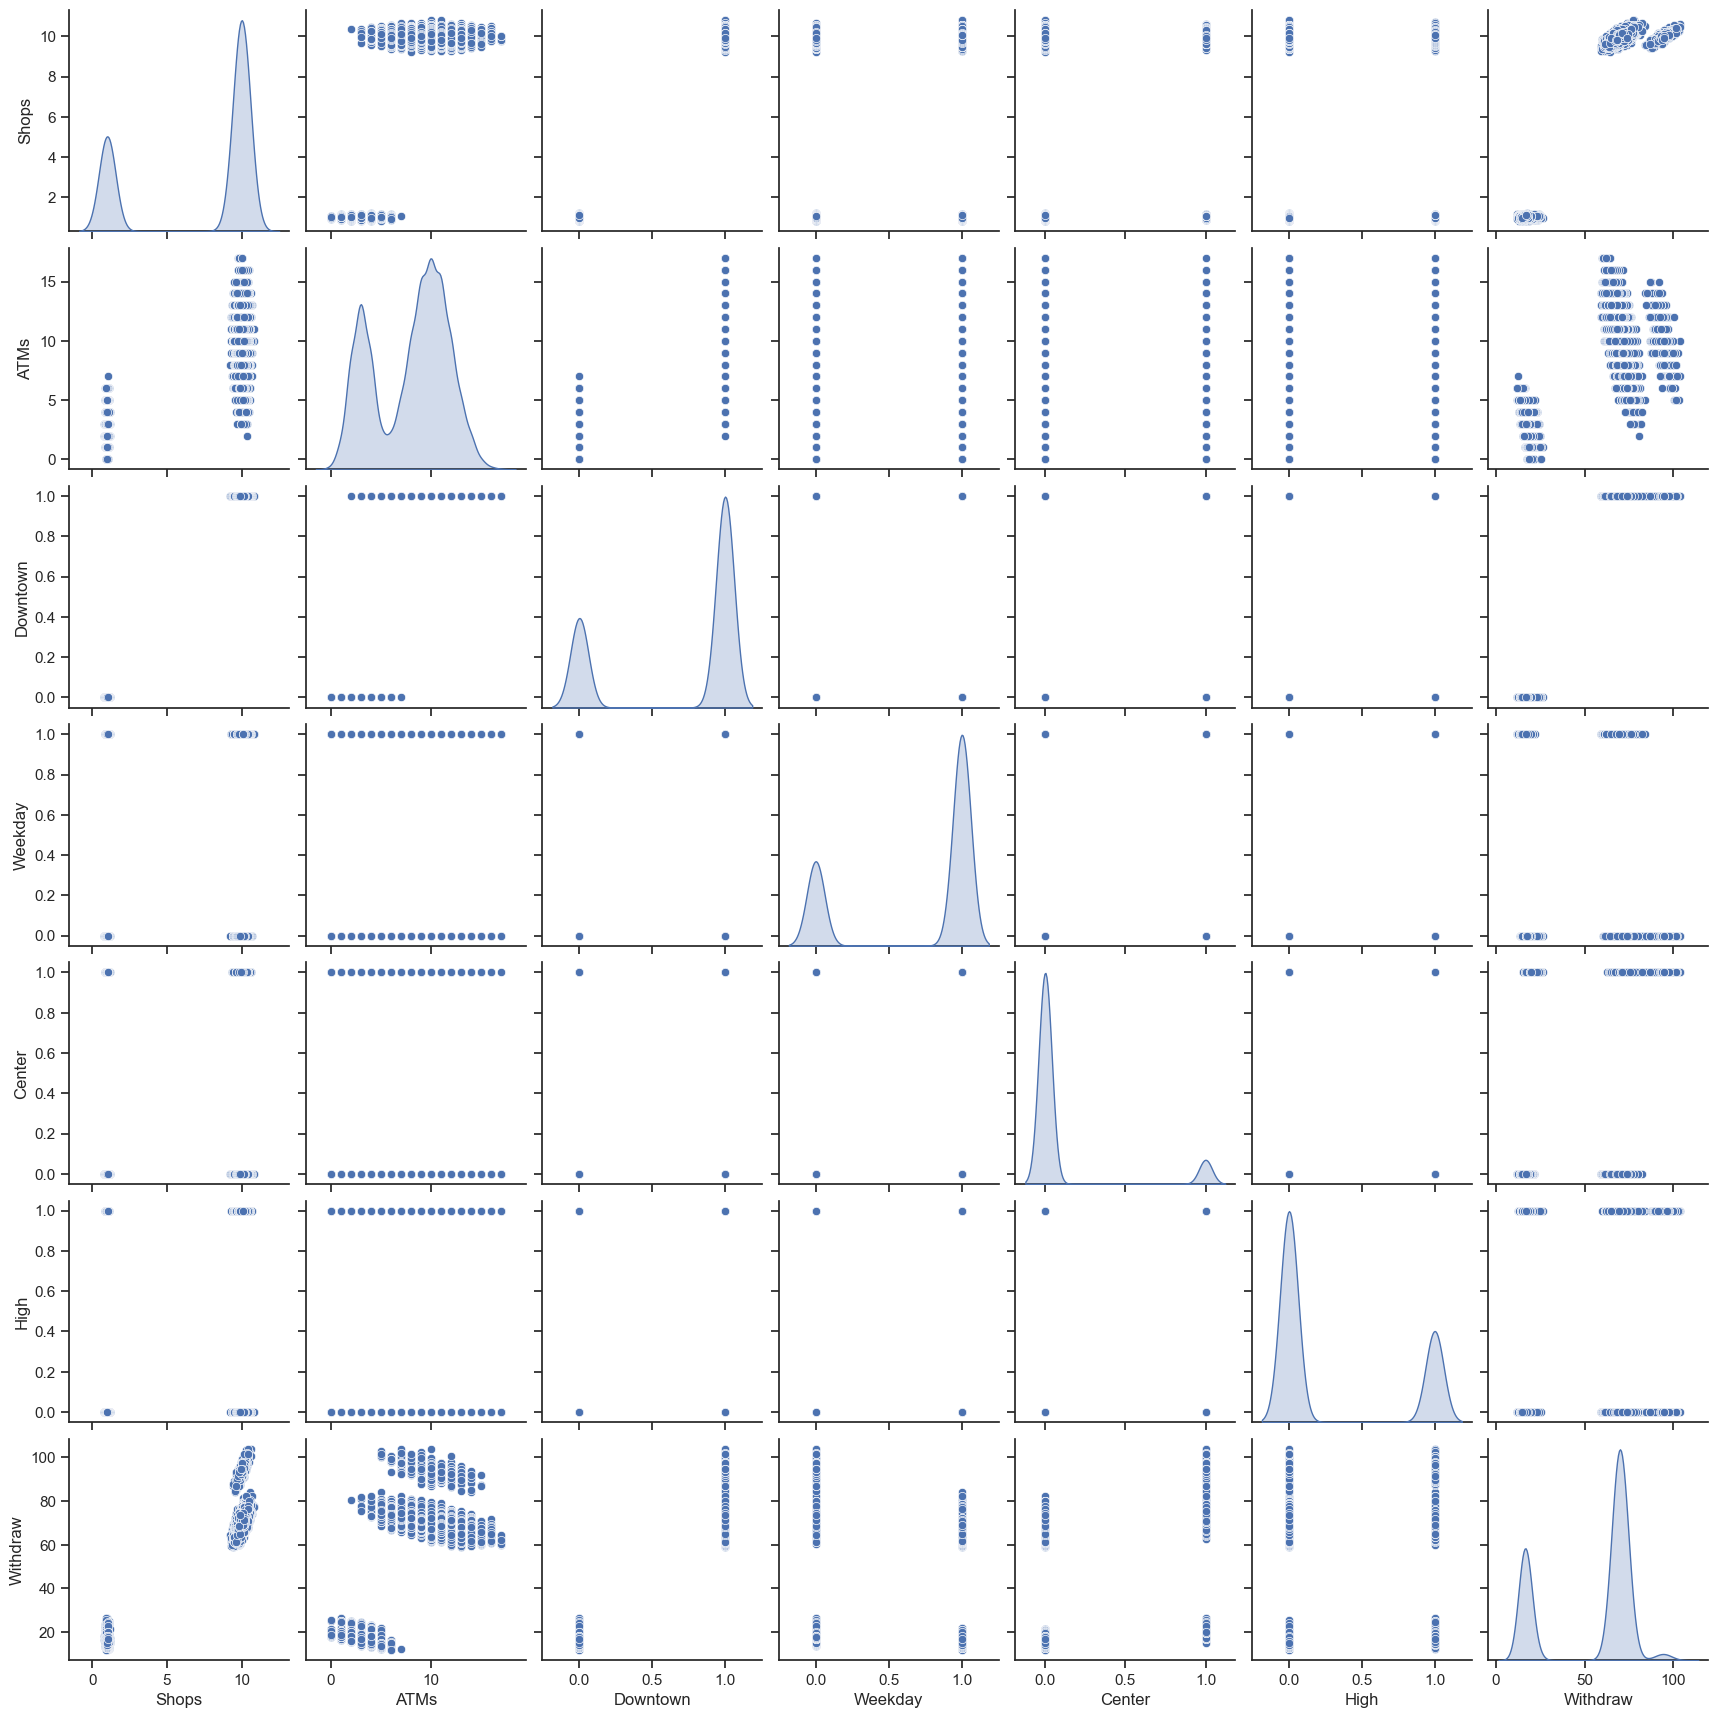

In [11]:
sns.set(style="ticks")
sns.pairplot(sample_data, kind="scatter", diag_kind="kde")
plt.show()

## Pairplot of categorical variables

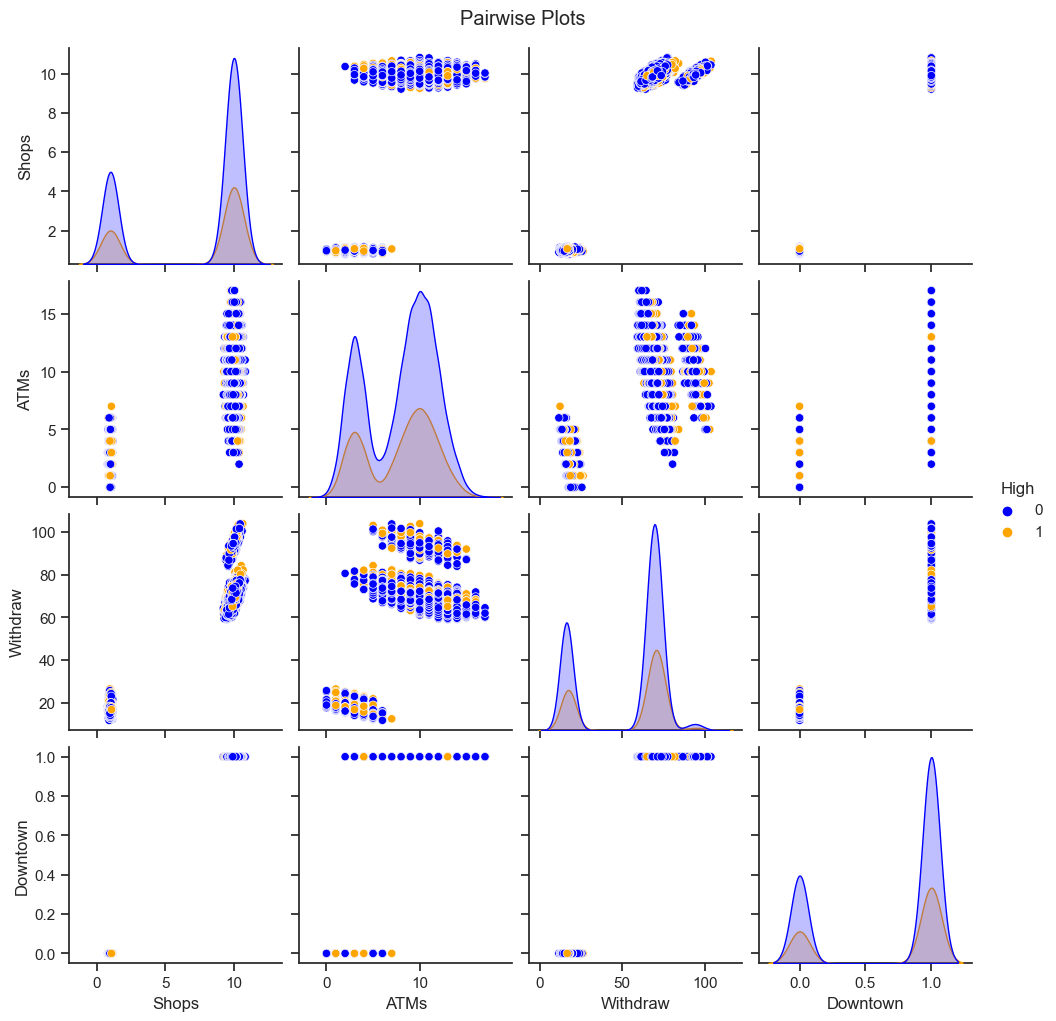

In [12]:
sns.pairplot(sample_data, vars=['Shops', 'ATMs', 'Withdraw', 'Downtown'], hue='High', palette={0: 'blue', 1: 'orange'})
plt.suptitle("Pairwise Plots", y=1.02)
plt.show()

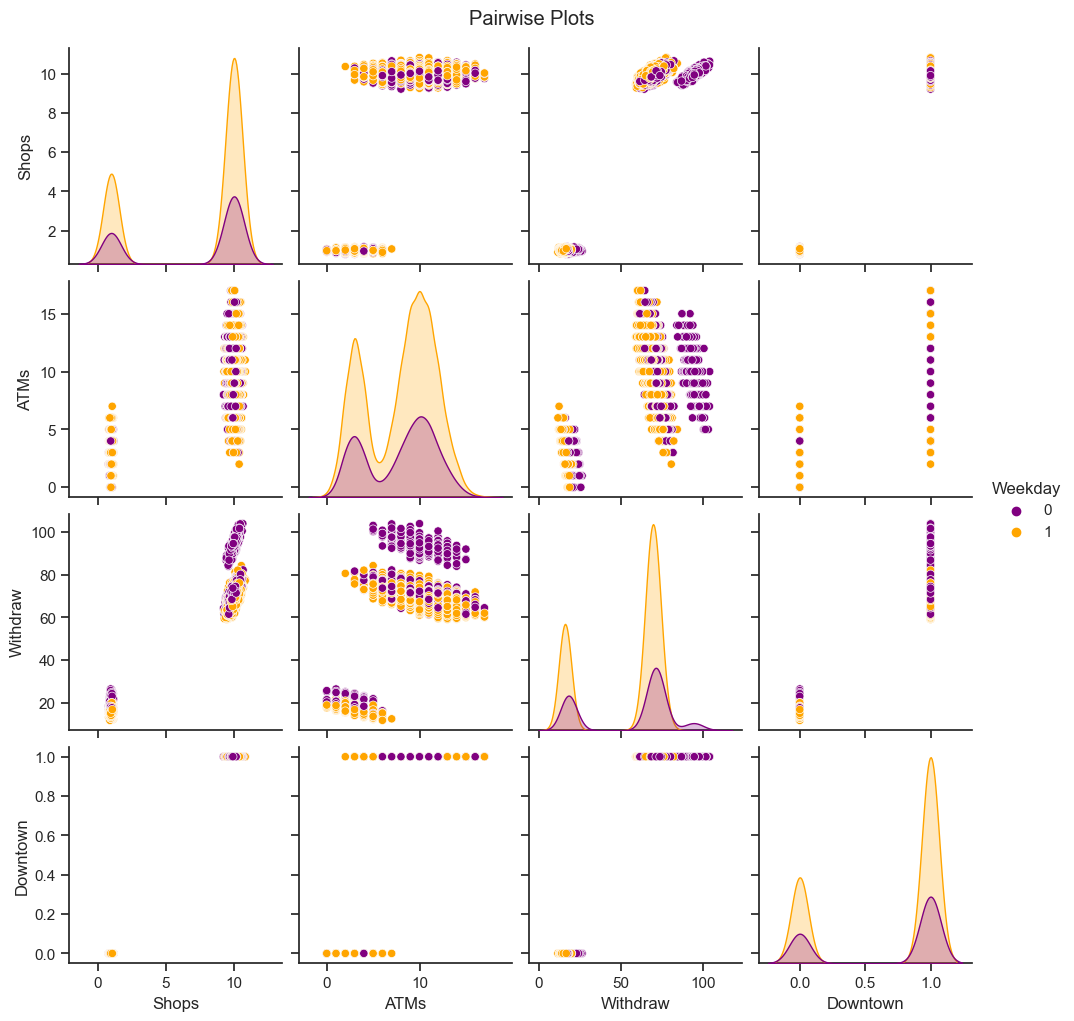

In [13]:
sns.pairplot(sample_data, vars=['Shops', 'ATMs', 'Withdraw', 'Downtown'], hue='Weekday', palette={0: 'purple', 1: 'orange'})
plt.suptitle("Pairwise Plots", y=1.02)
plt.show()